HW4 intro to ml

Prob 1 SVM

In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

from sklearn.svm import SVC
from sklearn import svm
from sklearn. decomposition import PCA as RandomizedPCA
from sklearn.decomposition import PCA


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

import seaborn as sns; sns.set()
from sklearn import metrics

from sklearn.model_selection import train_test_split


In [43]:
breast = load_breast_cancer()
breast_data = breast.data 
breast_data.shape

(569, 30)

In [44]:
breast_input = pd.DataFrame(breast_data) 
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [45]:
breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels], axis = 1)
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names 

features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset['label'].replace(0, 'Benign',inplace=True) 
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

In [46]:
pca = RandomizedPCA(n_components=150, whiten=True, random_state=60)
svc = SVC(kernel='rbf', class_weight="balanced")

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(breast_input, breast_labels, train_size=0.8, test_size=0.2, random_state = 60)

In [48]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test)

# for comparison with previous hw3
classifier = LogisticRegression(random_state=60) 
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=60)

In [49]:
Y_pred = classifier.predict(X_test) 
Y_pred[0:9]

array([0, 1, 1, 0, 1, 0, 0, 0, 0])

In [50]:
Y_pred = classifier.predict(X_test) 

In [51]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(Y_test, Y_pred) 
cnf_matrix 

array([[39,  1],
       [ 2, 72]])

In [52]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred)) 

Accuracy: 0.9736842105263158
Precision: 0.9863013698630136
Recall: 0.972972972972973


In [53]:
sc_X2 = StandardScaler()
breast_input_N = sc_X2.fit_transform(breast_input)

In [54]:
# rbf kernel
from sklearn.decomposition import PCA
accuracy_rate1 = [] 
precision_rate1 = [] 
recall_rate1 = []
for k in range(1,21):
  pca = PCA(n_components = k)
  principalComponents = pca.fit_transform(breast_input_N)
  principalDf = pd.DataFrame(data = principalComponents)
  from sklearn.model_selection import train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(principalComponents,
  breast_labels, train_size=0.8, test_size=0.2, random_state = 60) 
  classifier = SVC(kernel = 'rbf', C = 1E2)
  classifier.fit(X_train, Y_train)
  Y_pred = classifier.predict(X_test)
  from sklearn.metrics import confusion_matrix
  cnf2_matrix = confusion_matrix(Y_test, Y_pred)
  cnf2_matrix

  accuracy_rate1.append(metrics.accuracy_score(Y_test, Y_pred)) 
  precision_rate1.append(metrics.precision_score(Y_test, Y_pred)) 
  recall_rate1.append(metrics.recall_score(Y_test, Y_pred))
  print(k)
  print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
  print("Precision:",metrics.precision_score(Y_test, Y_pred))
  print("Recall:",metrics.recall_score(Y_test, Y_pred))
  print(" ")

1
Accuracy: 0.9035087719298246
Precision: 0.9090909090909091
Recall: 0.9459459459459459
 
2
Accuracy: 0.9473684210526315
Precision: 0.9594594594594594
Recall: 0.9594594594594594
 
3
Accuracy: 0.9649122807017544
Precision: 0.972972972972973
Recall: 0.972972972972973
 
4
Accuracy: 0.9649122807017544
Precision: 0.972972972972973
Recall: 0.972972972972973
 
5
Accuracy: 0.9912280701754386
Precision: 0.9866666666666667
Recall: 1.0
 
6
Accuracy: 0.9736842105263158
Precision: 0.9863013698630136
Recall: 0.972972972972973
 
7
Accuracy: 0.956140350877193
Precision: 0.9726027397260274
Recall: 0.9594594594594594
 
8
Accuracy: 0.9649122807017544
Precision: 0.972972972972973
Recall: 0.972972972972973
 
9
Accuracy: 0.956140350877193
Precision: 0.9859154929577465
Recall: 0.9459459459459459
 
10
Accuracy: 0.9736842105263158
Precision: 0.9863013698630136
Recall: 0.972972972972973
 
11
Accuracy: 0.9736842105263158
Precision: 0.9863013698630136
Recall: 0.972972972972973
 
12
Accuracy: 0.9824561403508771
Pr

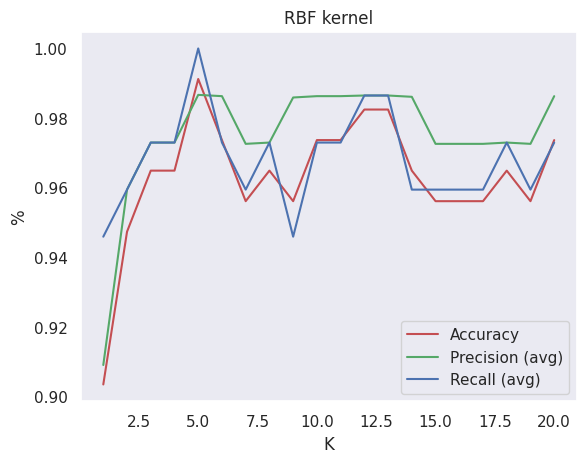

In [55]:
plt.figure(1)
plt.plot(range(1, len(accuracy_rate1)+1) , accuracy_rate1 , color='r') 
plt.plot(range(1, len(precision_rate1)+1) , precision_rate1 , color='g') 
plt.plot(range(1, len(recall_rate1)+1) , recall_rate1 , color='b') 
plt.grid()
plt.xlabel('K')
plt.ylabel('%')
plt.legend(["Accuracy", "Precision (avg)", "Recall (avg)"]) 
plt.title("RBF kernel") ;

In [56]:
# linear kernel
from sklearn.decomposition import PCA
accuracy_rate2 = [] 
precision_rate2 = [] 
recall_rate2 = []
for k in range(1,21):
  pca = PCA(n_components = k)
  principalComponents = pca.fit_transform(breast_input_N)
  principalDf = pd.DataFrame(data = principalComponents)
  from sklearn.model_selection import train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(principalComponents,
  breast_labels, train_size=0.8, test_size=0.2, random_state = 60) 
  classifier = SVC(kernel = 'linear', C = 1E2)
  classifier.fit(X_train, Y_train)
  Y_pred = classifier.predict(X_test)
  from sklearn.metrics import confusion_matrix
  cnf2_matrix = confusion_matrix(Y_test, Y_pred)
  cnf2_matrix
  #Let's evaluate the model using model evaluation metrics such as accuracy 
  accuracy_rate2.append(metrics.accuracy_score(Y_test, Y_pred)) 
  precision_rate2.append(metrics.precision_score(Y_test, Y_pred)) 
  recall_rate2.append(metrics.recall_score(Y_test, Y_pred))
  print(k)
  print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
  print("Precision:",metrics.precision_score(Y_test, Y_pred))
  print("Recall:",metrics.recall_score(Y_test, Y_pred))

1
Accuracy: 0.9210526315789473
Precision: 0.922077922077922
Recall: 0.9594594594594594
2
Accuracy: 0.9649122807017544
Precision: 0.9605263157894737
Recall: 0.9864864864864865
3
Accuracy: 0.9736842105263158
Precision: 0.9733333333333334
Recall: 0.9864864864864865
4
Accuracy: 0.9824561403508771
Precision: 0.9864864864864865
Recall: 0.9864864864864865
5
Accuracy: 0.9736842105263158
Precision: 0.9863013698630136
Recall: 0.972972972972973
6
Accuracy: 0.9736842105263158
Precision: 0.9863013698630136
Recall: 0.972972972972973
7
Accuracy: 0.9912280701754386
Precision: 0.9866666666666667
Recall: 1.0
8
Accuracy: 0.9912280701754386
Precision: 0.9866666666666667
Recall: 1.0
9
Accuracy: 0.9912280701754386
Precision: 0.9866666666666667
Recall: 1.0
10
Accuracy: 0.9912280701754386
Precision: 0.9866666666666667
Recall: 1.0
11
Accuracy: 0.9824561403508771
Precision: 0.9864864864864865
Recall: 0.9864864864864865
12
Accuracy: 0.9824561403508771
Precision: 0.9864864864864865
Recall: 0.9864864864864865
13
A

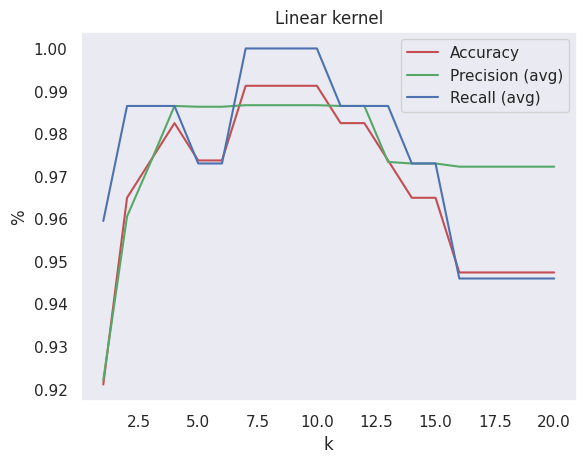

In [57]:
plt.figure(1)
plt.plot(range(1, len(accuracy_rate2)+1) , accuracy_rate2, color='r') 
plt.plot(range(1, len(precision_rate2)+1) , precision_rate2, color='g') 
plt.plot(range(1, len(recall_rate2)+1) , recall_rate2, color='b') 
plt.grid()
plt.xlabel('k')
plt.ylabel('%')
plt.legend(["Accuracy", "Precision (avg)", "Recall (avg)"]) 
plt.title("Linear kernel");

In [58]:
#  polynomial kernel 
from sklearn.decomposition import PCA
accuracy_rate3 = [] 
precision_rate3 = [] 
recall_rate3 = []
for k in range(1,21):
  pca = PCA(n_components = k)
  principalComponents = pca.fit_transform(breast_input_N)
  principalDf = pd.DataFrame(data = principalComponents)
  from sklearn.model_selection import train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(principalComponents,
  breast_labels, train_size=0.8, test_size=0.2, random_state = 60) 
  classifier = SVC(kernel = 'poly', C = 1E2)
  classifier.fit(X_train, Y_train)
  Y_pred = classifier.predict(X_test)
  from sklearn.metrics import confusion_matrix
  cnf2_matrix = confusion_matrix(Y_test, Y_pred)
  cnf2_matrix
  #Let's evaluate the model using model evaluation metrics such as accuracy 
  accuracy_rate3.append(metrics.accuracy_score(Y_test, Y_pred)) 
  precision_rate3.append(metrics.precision_score(Y_test, Y_pred)) 
  recall_rate3.append(metrics.recall_score(Y_test, Y_pred))
  print(k)
  print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
  print("Precision:",metrics.precision_score(Y_test, Y_pred))
  print("Recall:",metrics.recall_score(Y_test, Y_pred))

1
Accuracy: 0.868421052631579
Precision: 0.8390804597701149
Recall: 0.9864864864864865
2
Accuracy: 0.9473684210526315
Precision: 0.9358974358974359
Recall: 0.9864864864864865
3
Accuracy: 0.9824561403508771
Precision: 0.9864864864864865
Recall: 0.9864864864864865
4
Accuracy: 0.9824561403508771
Precision: 0.9864864864864865
Recall: 0.9864864864864865
5
Accuracy: 0.9824561403508771
Precision: 0.9864864864864865
Recall: 0.9864864864864865
6
Accuracy: 0.9736842105263158
Precision: 0.9863013698630136
Recall: 0.972972972972973
7
Accuracy: 0.9824561403508771
Precision: 0.9864864864864865
Recall: 0.9864864864864865
8
Accuracy: 0.9824561403508771
Precision: 0.9864864864864865
Recall: 0.9864864864864865
9
Accuracy: 0.9649122807017544
Precision: 0.9861111111111112
Recall: 0.9594594594594594
10
Accuracy: 0.9736842105263158
Precision: 0.9863013698630136
Recall: 0.972972972972973
11
Accuracy: 0.9736842105263158
Precision: 0.9863013698630136
Recall: 0.972972972972973
12
Accuracy: 0.9736842105263158
Pr

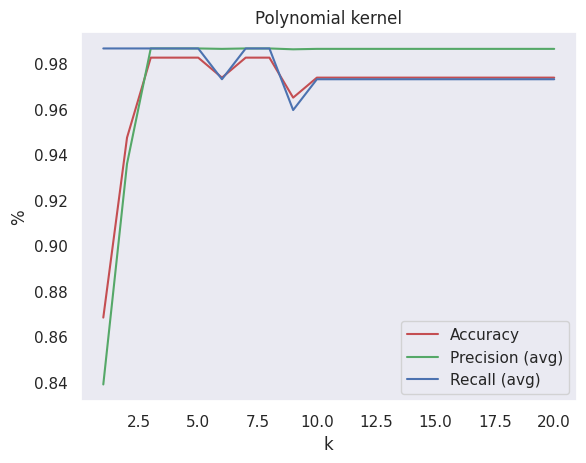

In [59]:
plt.figure(1)
plt.plot(range(1, len(accuracy_rate3)+1) , accuracy_rate3, color='r') 
plt.plot(range(1, len(precision_rate3)+1) , precision_rate3, color='g') 
plt.plot(range(1, len(recall_rate3)+1) , recall_rate3, color='b') 
plt.grid()
plt.xlabel('k')
plt.ylabel('%')
plt.legend(["Accuracy", "Precision (avg)", "Recall (avg)"]) 
plt.title("Polynomial kernel");

In [60]:
# sigmoid kernel 

from sklearn.decomposition import PCA
accuracy_rate4 = [] 
precision_rate4 = [] 
recall_rate4 = []
for k in range(1,22):
  pca = PCA(n_components = k)
  principalComponents = pca.fit_transform(breast_input_N)
  principalDf = pd.DataFrame(data = principalComponents)
  from sklearn.model_selection import train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(principalComponents,
  breast_labels, train_size=0.8, test_size=0.2, random_state = 60) 
  classifier = SVC(kernel = 'sigmoid', C = 1E2)
  classifier.fit(X_train, Y_train)
  Y_pred = classifier.predict(X_test)
  from sklearn.metrics import confusion_matrix
  cnf2_matrix = confusion_matrix(Y_test, Y_pred)
  cnf2_matrix

  accuracy_rate4.append(metrics.accuracy_score(Y_test, Y_pred)) 
  precision_rate4.append(metrics.precision_score(Y_test, Y_pred)) 
  recall_rate4.append(metrics.recall_score(Y_test, Y_pred))
  
  print(k)
  print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
  print("Precision:",metrics.precision_score(Y_test, Y_pred))
  print("Recall:",metrics.recall_score(Y_test, Y_pred))

1
Accuracy: 0.8771929824561403
Precision: 0.8846153846153846
Recall: 0.9324324324324325
2
Accuracy: 0.8508771929824561
Precision: 0.9130434782608695
Recall: 0.8513513513513513
3
Accuracy: 0.9035087719298246
Precision: 0.9436619718309859
Recall: 0.9054054054054054
4
Accuracy: 0.9385964912280702
Precision: 0.971830985915493
Recall: 0.9324324324324325
5
Accuracy: 0.9473684210526315
Precision: 0.9594594594594594
Recall: 0.9594594594594594
6
Accuracy: 0.9473684210526315
Precision: 0.9722222222222222
Recall: 0.9459459459459459
7
Accuracy: 0.9473684210526315
Precision: 0.9594594594594594
Recall: 0.9594594594594594
8
Accuracy: 0.9385964912280702
Precision: 0.958904109589041
Recall: 0.9459459459459459
9
Accuracy: 0.9473684210526315
Precision: 0.9722222222222222
Recall: 0.9459459459459459
10
Accuracy: 0.9385964912280702
Precision: 0.958904109589041
Recall: 0.9459459459459459
11
Accuracy: 0.9298245614035088
Precision: 0.9583333333333334
Recall: 0.9324324324324325
12
Accuracy: 0.9385964912280702
P

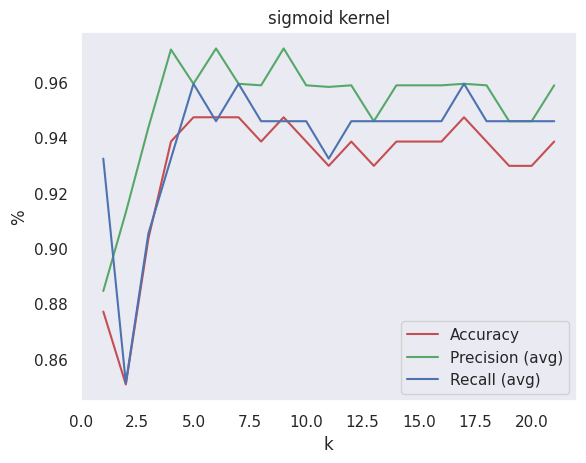

In [61]:
plt.figure(1)
plt.plot(range(1, len(accuracy_rate4)+1) , accuracy_rate4, color='r') 
plt.plot(range(1, len(precision_rate4)+1) , precision_rate4, color='g') 
plt.plot(range(1, len(recall_rate4)+1) , recall_rate4, color='b') 
plt.grid()
plt.xlabel('k')
plt.ylabel('%')
plt.legend(["Accuracy", "Precision (avg)", "Recall (avg)"]) 
plt.title("sigmoid kernel");

Prob 2 SVR

In [62]:
from sklearn.svm import SVR
from sklearn. decomposition import PCA as RandomizedPCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.linear_model import LogisticRegression

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt

from sklearn import metrics

import warnings 
warnings.filterwarnings('ignore')

In [63]:
df = pd.read_csv('https://raw.githubusercontent.com/Onkar-Indurkar/Intro-to-ML/main/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [64]:
m = len(df)

In [65]:
#converting yes's & no's to 1s & 0s as strings cannot be used only int

list1 = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map (v1) :
    return v1.map({'yes' : 1, "no": 0})

df[list1] = df[list1] . apply(binary_map)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [66]:
#To not get any faulty errors eg Nan also not asked in Q -
df = df.drop(labels = "furnishingstatus",axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [67]:
#splitting dataframe into 80% training data & 20% testing data
np.random.seed(0)
dfTrain, dfTest =train_test_split(df, train_size = 0.8, test_size = 0.2)
dfTrain.shape

(436, 12)

In [68]:
list2 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
dfTrainA = dfTrain[list2]
dfTestA = dfTest[list2]
dfTrainA.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,1750000,3620,2,1,1,1,0,0,0,0,0,0
496,2695000,4000,2,1,1,1,0,0,0,0,0,0
484,2870000,3040,2,1,1,0,0,0,0,0,0,0
507,2590000,3600,2,1,1,1,0,0,0,0,0,0
252,4515000,9860,3,1,1,1,0,0,0,0,0,0


In [69]:
X = dfTestA.values[:,1:13] 
Y = dfTestA.values[:,0]

In [70]:
sc_X2 = StandardScaler() 
X1 = sc_X2.fit_transform(X) 

Y =Y.reshape(-1,1)
X1

array([[-0.50073521,  0.02560738, -0.56354451, ..., -0.63042517,
         0.49214421, -0.48850421],
       [ 1.95422869,  0.02560738, -0.56354451, ..., -0.63042517,
         1.73967255,  2.04706526],
       [-0.73662142,  1.42120937, -0.56354451, ...,  1.58623108,
        -0.75538413, -0.48850421],
       ...,
       [ 0.399127  , -1.36999462, -0.56354451, ..., -0.63042517,
         0.49214421, -0.48850421],
       [-0.28232205, -1.36999462, -0.56354451, ..., -0.63042517,
         0.49214421, -0.48850421],
       [ 0.41660006,  0.02560738,  1.2431129 , ..., -0.63042517,
         1.73967255,  2.04706526]])

In [71]:
Y1= sc_X2.fit_transform(Y) 

In [72]:
# svr rbf kernerl-
MSE = []
for k in range(1,12):
  pca = PCA(n_components = k)
  principalComponents = pca.fit_transform(X1)
  principalDf = pd.DataFrame(data = principalComponents)
  from sklearn.model_selection import train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y1, test_size=0.2, random_state = 60) 

  classifier = SVR(kernel = 'rbf', C = 1E2)
  classifier.fit(X_train, Y_train)
  Y_pred = classifier.predict(X_test)

  MSE.append(mean_squared_error(Y_test, Y_pred))
  print(k)
  print(MSE[-1])
  print(" ")

1
0.3560504033717174
 
2
0.4462878431198611
 
3
0.5640211854166174
 
4
0.6916564320778114
 
5
0.8209680720744974
 
6
0.8336276854867927
 
7
0.8646275857620288
 
8
0.851621099380388
 
9
0.6558236358365811
 
10
0.5591151145741355
 
11
0.561095739855324
 


(11,)


<Figure size 640x480 with 0 Axes>

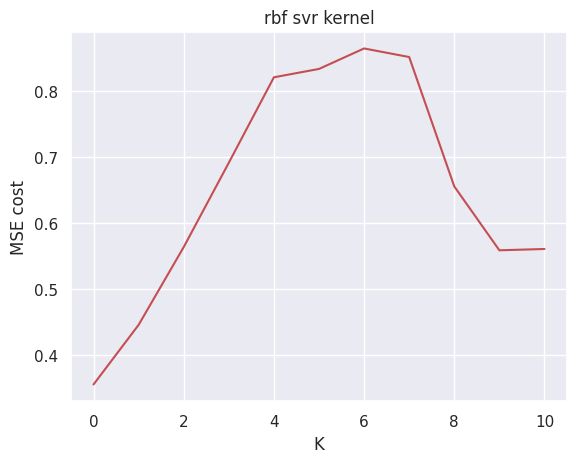

In [73]:
plt.figure(1)
fig = plt.figure(dpi=100) 
print(np.array(MSE).shape)
plt.plot(MSE, color='r') 
plt.grid(mean_squared_error(Y_test, Y_pred)) 
plt.xlabel('K')
plt.ylabel('MSE cost')
plt.title("rbf svr kernel");

In [74]:
# svr linear kernerl-

MSE = []
for k in range(1,12):
  pca = PCA(n_components = k)
  principalComponents = pca.fit_transform(X1)
  principalDf = pd.DataFrame(data = principalComponents)
  from sklearn.model_selection import train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y1, test_size=0.2, random_state = 60)
  classifier = SVR(kernel = 'linear', C = 1E2)
  classifier.fit(X_train, Y_train)
  Y_pred = classifier.predict(X_test)
  MSE.append(mean_squared_error(Y_test, Y_pred))
  print('k=', k)
  print(MSE[-1]) 
  print(" ")

k= 1
0.3454809293562034
 
k= 2
0.26609193914124946
 
k= 3
0.26107286590749595
 
k= 4
0.2867369282837562
 
k= 5
0.2717860112457204
 
k= 6
0.2721508801760958
 
k= 7
0.26632401391443167
 
k= 8
0.274529347372167
 
k= 9
0.23286089906104787
 
k= 10
0.2959484488724035
 
k= 11
0.36490812136597894
 


(11,)


<Figure size 640x480 with 0 Axes>

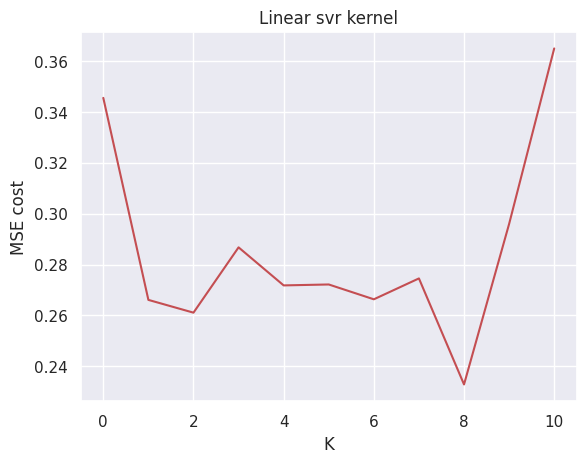

In [75]:
plt.figure(1)
fig = plt.figure(dpi=100) 
print(np.array(MSE).shape)
plt.plot(MSE, color='r') 
plt.grid(mean_squared_error(Y_test, Y_pred)) 
plt.xlabel('K')
plt.ylabel('MSE cost')
plt.title("Linear svr kernel");

In [76]:
# polynomial kernel svr

MSE = []
for k in range(1,12):
  pca = PCA(n_components = k)
  principalComponents = pca.fit_transform(X1)
  principalDf = pd.DataFrame(data = principalComponents)
  from sklearn.model_selection import train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y1, test_size=0.2, random_state = 60) 
  classifier = SVR(kernel = 'poly', C = 1E2)
  classifier.fit(X_train, Y_train)
  Y_pred = classifier.predict(X_test)

  MSE.append(mean_squared_error(Y_test, Y_pred))
  print(k)
  print(MSE[-1]) 
  print(" ")

1
0.4671012876183497
 
2
0.2736866703756691
 
3
0.46504550545000517
 
4
0.5734670483484723
 
5
0.7943166907221522
 
6
5.419216444105126
 
7
7.206740493966575
 
8
1.6246127661402063
 
9
2.5725479262967856
 
10
2.3858480278675596
 
11
1.1253237102152696
 


(11,)


<Figure size 640x480 with 0 Axes>

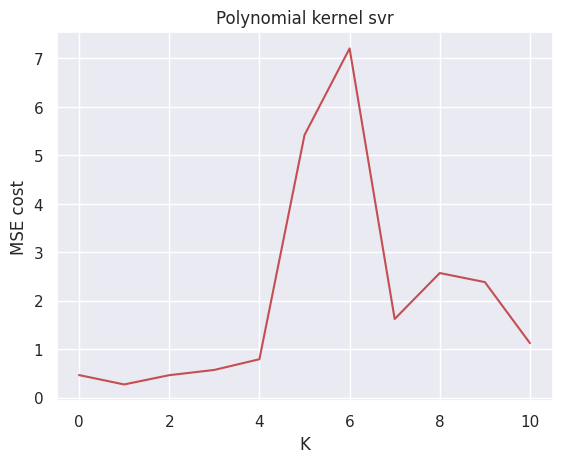

In [77]:
plt.figure(1)
fig = plt.figure(dpi=100) 
print(np.array(MSE).shape)
plt.plot(MSE, color='r') 
plt.grid(mean_squared_error(Y_test, Y_pred)) 
plt.xlabel('K')
plt.ylabel('MSE cost')
plt.title("Polynomial kernel svr");

In [78]:
# sigmoid kernel svr
MSE = []
for k in range(1,12):
  pca = PCA(n_components = k)
  principalComponents = pca.fit_transform(X1)
  principalDf = pd.DataFrame(data = principalComponents)
  from sklearn.model_selection import train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y1, test_size=0.2, random_state = 60)
  classifier = SVR(kernel = 'sigmoid', C = 1E2)
  classifier.fit(X_train, Y_train)
  Y_pred = classifier.predict(X_test)
  MSE.append(mean_squared_error(Y_test, Y_pred))
  print(k)
  print(MSE[-1]) 
  print(" ")

1
122954.86094889218
 
2
51390.31940654992
 
3
22868.92702706676
 
4
6356.369839333943
 
5
4461.569042428463
 
6
4494.636871039328
 
7
3105.1221852755875
 
8
3496.188181305237
 
9
2686.999653821308
 
10
951.588413031759
 
11
2492.0702175276706
 


(11,)


<Figure size 640x480 with 0 Axes>

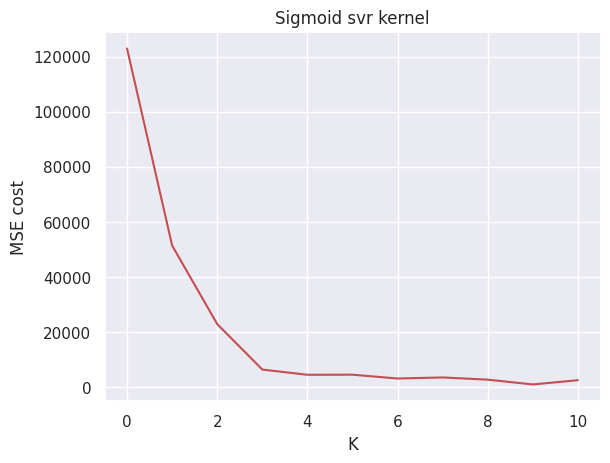

In [79]:
plt.figure(1)
fig = plt.figure(dpi=100) 
print(np.array(MSE).shape)
plt.plot(MSE, color='r') 
plt.grid(mean_squared_error(Y_test, Y_pred)) 
plt.xlabel('K')
plt.ylabel('MSE cost')
plt.title("Sigmoid svr kernel");

In [80]:
# sigmoid kernel svr
MSE = []
for k in range(4,12):
  pca = PCA(n_components = k)
  principalComponents = pca.fit_transform(X1)
  principalDf = pd.DataFrame(data = principalComponents)
  from sklearn.model_selection import train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y1, test_size=0.2, random_state = 60)
  classifier = SVR(kernel = 'sigmoid', C = 1E2)
  classifier.fit(X_train, Y_train)
  Y_pred = classifier.predict(X_test)
  MSE.append(mean_squared_error(Y_test, Y_pred))
  print(k)
  print(MSE[-1]) 
  print(" ")

4
6356.369839333943
 
5
4461.569042428463
 
6
4494.636871039328
 
7
3105.1221852755875
 
8
3496.188181305237
 
9
2686.999653821308
 
10
951.588413031759
 
11
2492.0702175276706
 


(8,)


<Figure size 640x480 with 0 Axes>

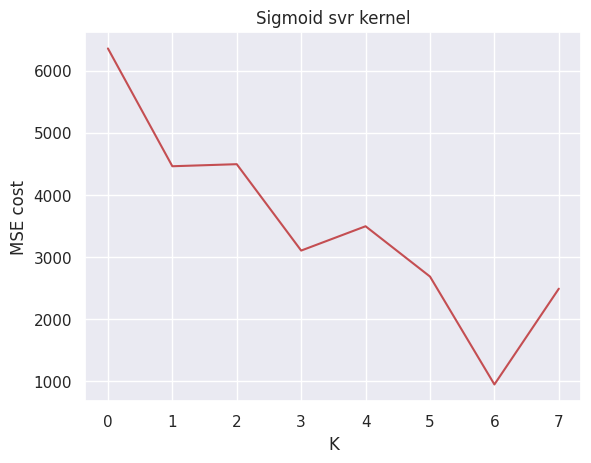

In [81]:
plt.figure(1)
fig = plt.figure(dpi=100) 
print(np.array(MSE).shape)
plt.plot(MSE, color='r') 
plt.grid(mean_squared_error(Y_test, Y_pred)) 
plt.xlabel('K')
plt.ylabel('MSE cost')
plt.title("Sigmoid svr kernel");